In [197]:
import numpy as np
from scipy import signal
from scipy import linalg
from scipy import fft
from scipy.fft import fftshift
from scipy.io import wavfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import pprint as pp

np.random.seed(123)

In [198]:
def mic_sig(N, fs, fc, fm, fd):
    t = np.arange(N) / fs
    x = np.exp(1.j*(2.*np.pi*fc*t + fd/fm*np.sin(2.*np.pi*fm*t)))
    return x


# def get_sig(N, fs, fc, fm, fd):

#     n = np.arange(N)
#     t = n/fs

#     if fc is None:
#         fc = fs/4.

#     ph0 = np.random.random() * 2. * np.pi
#     ph = ph0 + 2.0*np.pi*fc*t + fd/fm * np.cos(2.0*np.pi*fm*t)
#     x = np.cos(ph)

#     return x

In [199]:
N = int(np.power(2., np.ceil(np.log2(10e5))))
fs = int(1e6)
fm = int(3.9e3)
fd = int(15e3)
fc = int(1e5)
sig1 = mic_sig(N, fs=fs, fc=0, fm=fm, fd=fd)
sig2 = mic_sig(N, fs=fs, fc=0, fm=fm, fd=-fd)

sig = np.concatenate((sig1, sig2))

# fc = int(-1e5)
# sig = mic_sig(N, fs=fs, fc=fc, fm=fm, fd=fd)
# fc = int(1e5)
# sig += mic_sig(N, fs=fs, fc=fc, fm=fm, fd=fd)
# fc = int(2e5)
# sig += mic_sig(N, fs=fs, fc=fc, fm=fm, fd=fd)
# fc = int(-2e5)
# sig += mic_sig(N, fs=fs, fc=fc, fm=fm, fd=fd)
# fc = int(-3e5)
# sig += mic_sig(N, fs=fs, fc=fc, fm=fm, fd=fd)
# fc = int(3e5)
# sig += mic_sig(N, fs=fs, fc=fc, fm=fm, fd=fd)

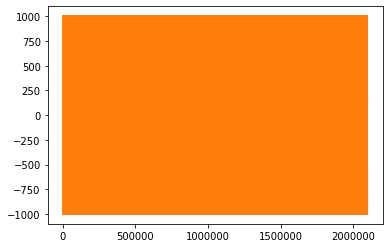

In [200]:
# sig_2d = np.column_stack((sig.real.astype(int), sig.imag.astype(int)))
sig_2d = np.column_stack((np.int16(sig.real*1000), np.int16(sig.imag*1000)))

# wavfile.write("example.wav", samplerate, np.column_stack((np.int16(data), np.int16(data))))
wavfile.write("test.wav", fs, sig_2d)

plt.plot(sig_2d)
plt.show()

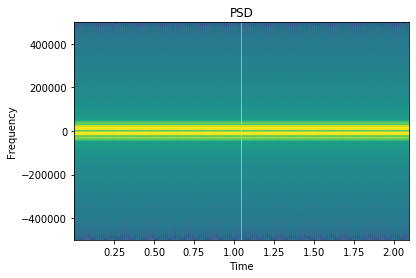

In [201]:
plt.specgram(sig, NFFT=1024, Fs=fs)
plt.title("PSD")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [202]:
# plt.plot(sig[10:30])
# plt.show()

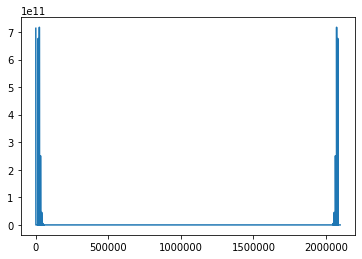

In [203]:
plt.plot(np.abs(fft.fft(sig))**2)
plt.show()

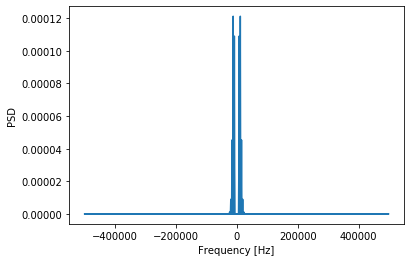

In [204]:
f1, Pxx_den = signal.welch(sig, fs, nperseg=1024, noverlap=0)
plt.plot(f1, Pxx_den)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

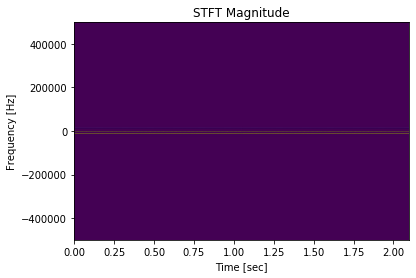

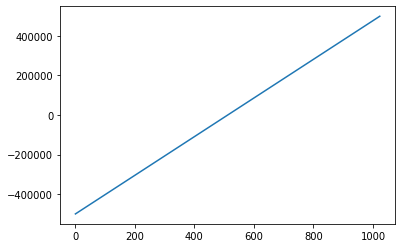

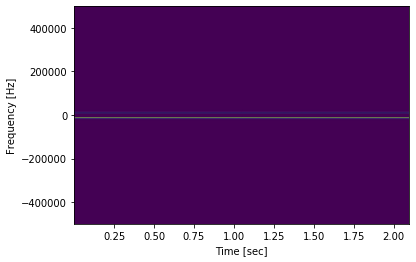

In [205]:
f, t, Zxx = signal.stft(sig, fs, window='boxcar', nperseg=1024)

Z = np.abs(Zxx*np.conj(Zxx))

# plt.pcolormesh(t, fn, Z, shading='gouraud')
plt.pcolormesh(t, fftshift(f), fftshift(Z, axes=0), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# print('Len:', len(t))

plt.plot(fftshift(f))
plt.show()

# plt.plot(fftshift(f), fftshift(Z, axes=0))
# plt.show()

# for i in range(len(t)):
#     plt.plot(np.abs(Zxx*np.conj(Zxx))[:, i])
#     plt.show()

# f, t, Sxx = signal.spectrogram(sig, fs, window='tukey', nperseg=1024)
f, t, Sxx = signal.spectrogram(sig, fs, window='hann', nperseg=1024)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [206]:
# f, t, Sxx = signal.spectrogram(sig, fs)
# plt.pcolormesh(t, f, Sxx)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

# plt.plot(Sxx)
# plt.show()

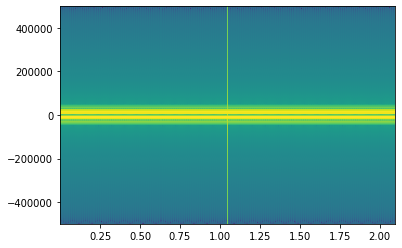

In [207]:
plt.specgram(sig, Fs=fs, NFFT=1024, scale='dB')
plt.show()

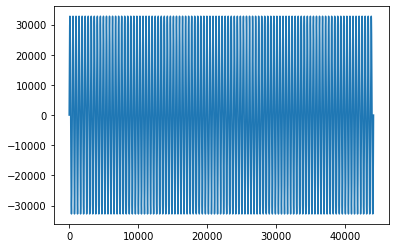

In [208]:
from scipy.io.wavfile import write
samplerate = 44100; fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("example.wav", samplerate, np.column_stack((np.int16(data), np.int16(data))))
# write("example.wav", samplerate, (np.int16(data))
# write("example.wav", samplerate, data)

plt.plot(np.int16(data))
plt.show()